<a href="https://colab.research.google.com/github/mohameddhameem/TensorflowCertification/blob/main/Natural%20Language%20Processing%20in%20TensorFlow/Week%204/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2021-05-15 14:55:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.15.80, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-05-15 14:55:51 (96.1 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.L1(0.01))) ## A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [9]:
history = model.fit(predictors, label, epochs=100, verbose=2)

Epoch 1/100
484/484 [==============================] - 40s 11ms/step - loss: 15.3421 - accuracy: 0.0199
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7390 - accuracy: 0.0200
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7476 - accuracy: 0.0207
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7394 - accuracy: 0.0232
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7524 - accuracy: 0.0216
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7596 - accuracy: 0.0197
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7594 - accuracy: 0.0236
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7483 - accuracy: 0.0226
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7544 - accuracy: 0.0244
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 6.7

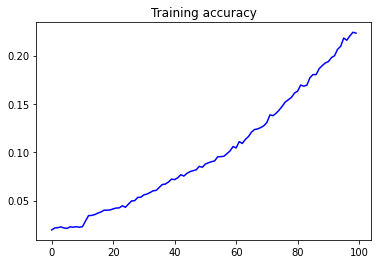

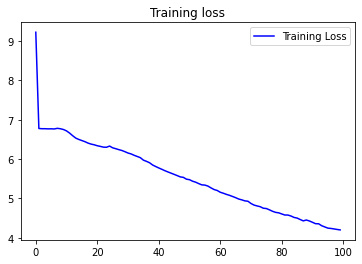

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope and all the heart should wilt his love were truth i'll spend seen woe art shall art were maintain are boast to love thou see my love were be increase art and gone with thy heart were lie of this beauty brings store thou night were grossly gone of the love another own love finds the eye shall lie of me all love is in thee doth seen hymns more forth injury of ' can am seen injury of life should love another more which thou forth injury of water seen were injury and ill wilt seen see this forth


In [ ]:
``